In [4]:
# install.packages('explore')

In [5]:
library(dplyr)
library(explore)

In [8]:
head(mtcars)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

In [22]:
summary(mtcars)

In [6]:
mtcars %>% describe()

variable type na na_pct unique min   mean   max   
1  mpg      dbl  0  0      25     10.40  20.09  33.90
2  cyl      dbl  0  0       3      4.00   6.19   8.00
3  disp     dbl  0  0      27     71.10 230.72 472.00
4  hp       dbl  0  0      22     52.00 146.69 335.00
5  drat     dbl  0  0      22      2.76   3.60   4.93
6  wt       dbl  0  0      29      1.51   3.22   5.42
7  qsec     dbl  0  0      30     14.50  17.85  22.90
8  vs       dbl  0  0       2      0.00   0.44   1.00
9  am       dbl  0  0       2      0.00   0.41   1.00
10 gear     dbl  0  0       3      3.00   3.69   5.00
11 carb     dbl  0  0       6      1.00   2.81   8.00

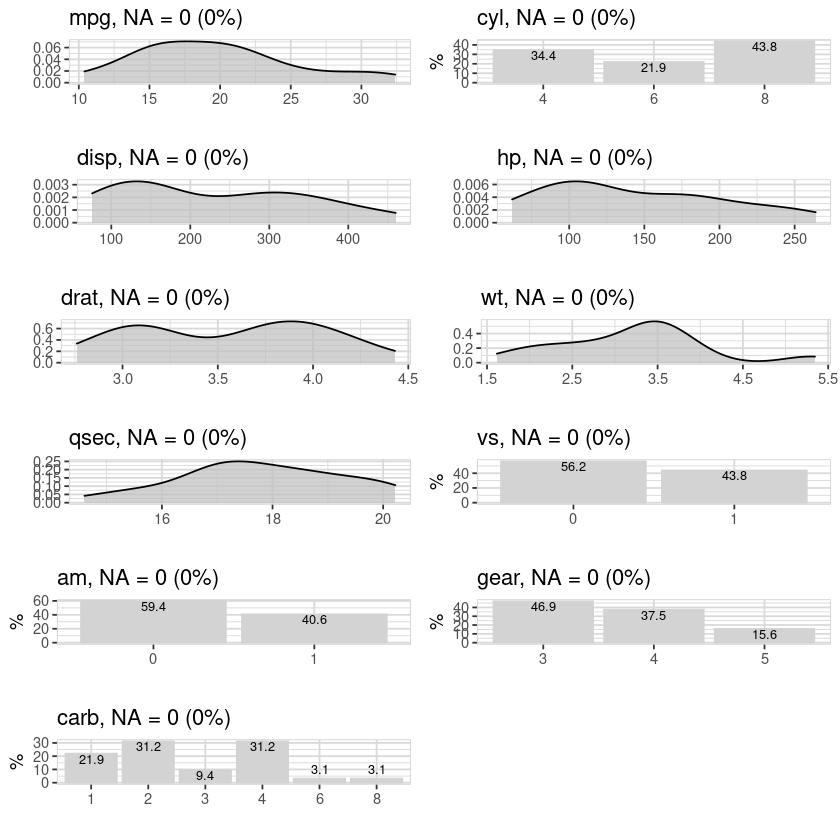

In [7]:
mtcars %>% 
  explore_all()

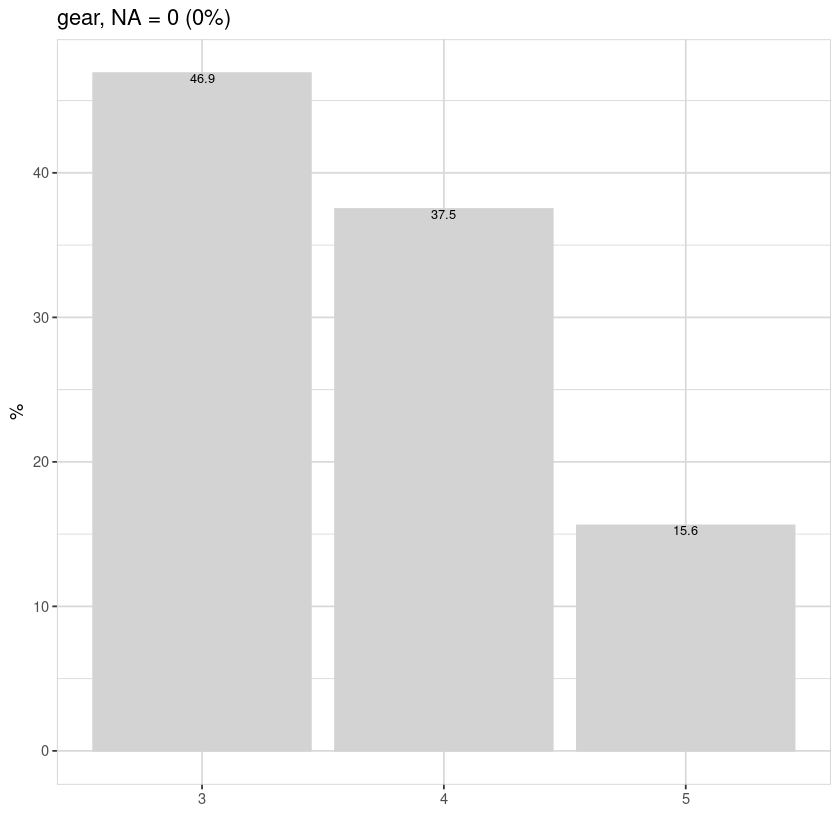

In [10]:
mtcars %>% 
  explore(gear)

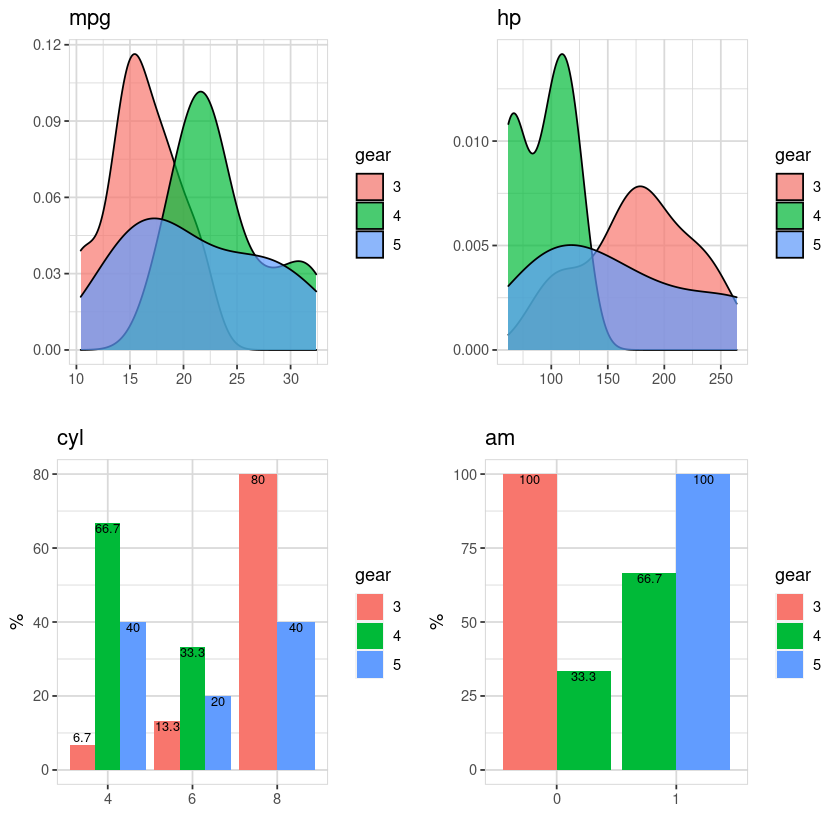

In [9]:
mtcars %>% 
  select(gear, mpg, hp, cyl, am) %>% 
  explore_all(target = gear)

In [12]:
head(mtcars)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

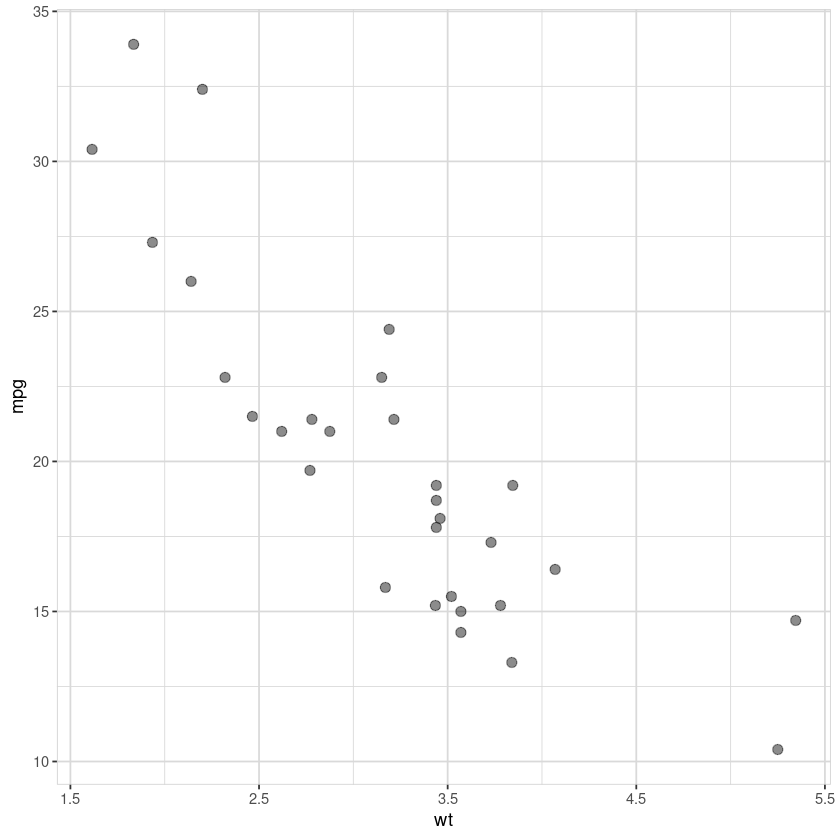

In [11]:
mtcars %>% explore(wt, mpg)

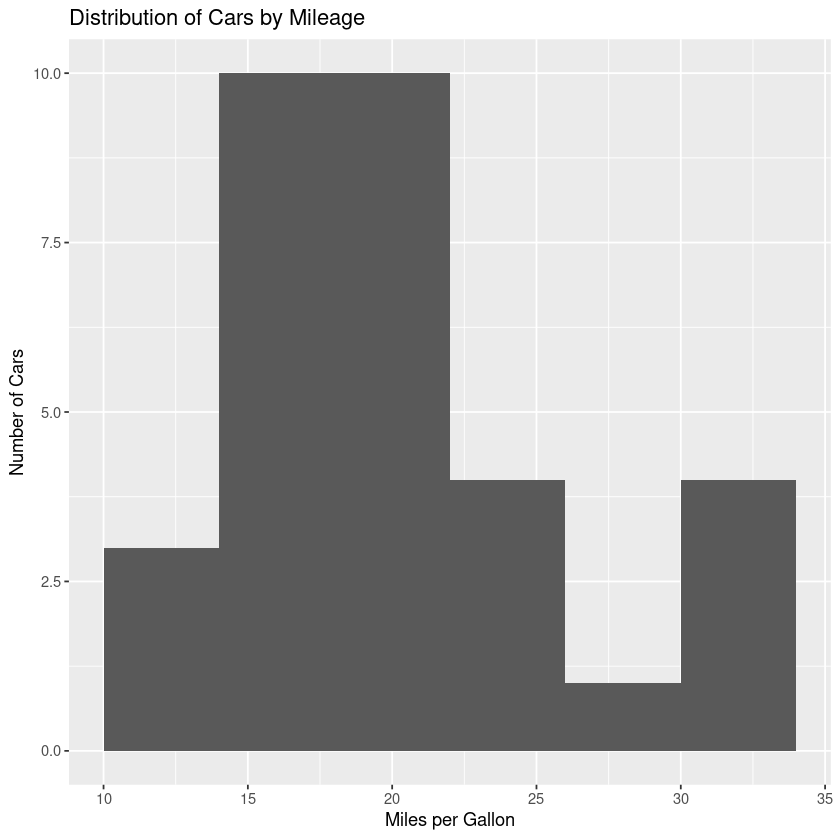

In [23]:
library(ggplot2)
ggplot(mtcars, aes(mpg)) +
  geom_histogram(binwidth = 4) + xlab('Miles per Gallon') + ylab('Number of Cars') + 
   ggtitle('Distribution of Cars by Mileage')

`geom_smooth()` using formula 'y ~ x'



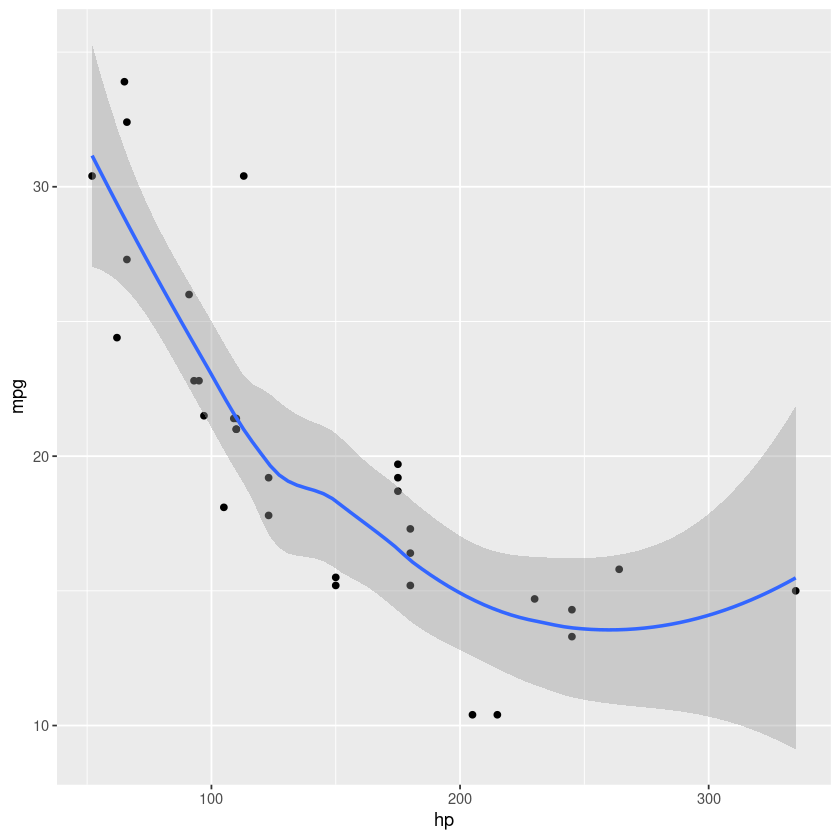

In [29]:
ggplot(mtcars, aes(hp, mpg)) + geom_point() +
  geom_smooth(method = "loess", se = TRUE) #+
#   ylab("Miles per Gallon") +
#   xlab("No. of Horsepower") +
#   ggtitle("Impact of Number of Horsepower on MPG")

The 95% confidence bands measure uncertainty of the predicted mean values on the regression line corresponding to each x-value (Figure 17.2-1, left). The confidence limits are the upper and lower edge of the shaded area in the following plot.

Commonly used methods for constructing simultaneous confidence bands in regression are the Bonferroni and Scheffé methods; see Familywise error rate controlling procedures for more. 

`geom_smooth()` using formula 'y ~ x'



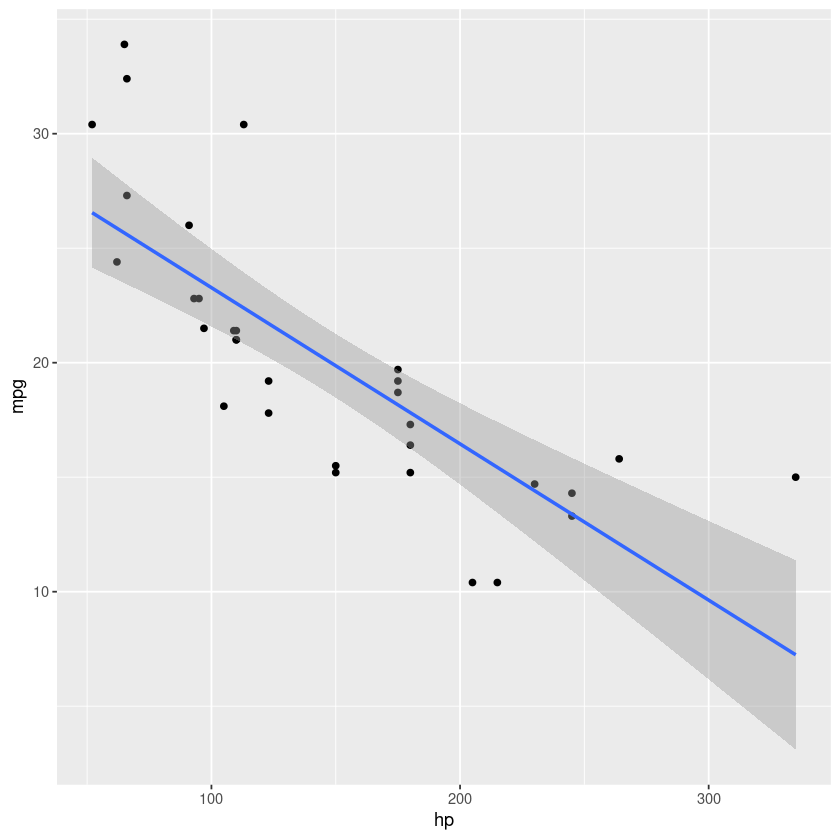

In [30]:
ggplot(mtcars, aes(hp, mpg)) + geom_point() +
  geom_smooth(method = "lm", se = TRUE) 
# +
#   ylab("Miles per Gallon") +
#   xlab("No. of Horsepower") +
#   ggtitle("Impact of Number of Horsepower on MPG")

In [32]:
df1 = mtcars[c('hp', 'mpg')]

In [36]:
mtreg <- lm(mpg ~ hp, data = df1)
summary(mtreg)


Call:
lm(formula = mpg ~ hp, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


https://data.library.virginia.edu/diagnostic-plots/

In [49]:
plot(mtreg)

In [41]:
summary(mtreg)$coefficients
summary(mtreg)$coefficients[2,3]

Estimate    Std. Error t value   Pr(>|t|)    
(Intercept) 30.09886054 1.6339210  18.421246 6.642736e-18
hp          -0.06822828 0.0101193  -6.742389 1.787835e-07

[1] -6.742389

In [38]:
confint(mtreg)

2.5 %       97.5 %    
(Intercept) 26.76194879 33.4357723
hp          -0.08889465 -0.0475619

In [52]:
prdf = data.frame(df1, predict(mtreg, interval = "prediction"))

Warning message in predict.lm(mtreg, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


In [54]:
# prdf

`geom_smooth()` using formula 'y ~ x'



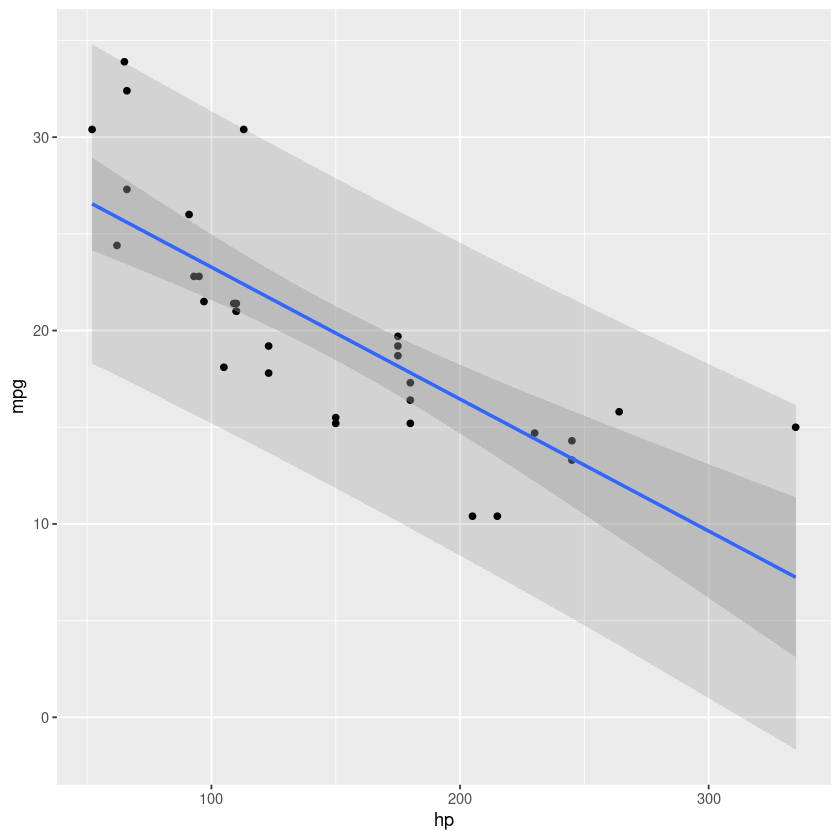

In [57]:
ggplot(prdf, aes(hp, mpg)) + geom_point() +
    geom_ribbon(aes(ymin = lwr, ymax = upr, fill='prediction'), 
        fill = "black", alpha = 0.1)+
  geom_smooth(method = "lm", se = TRUE) 
# +
#   ylab("Miles per Gallon") +
#   xlab("No. of Horsepower") +
#   ggtitle("Impact of Number of Horsepower on MPG")

In [27]:
?geom_smooth